<a href="https://colab.research.google.com/github/sglhsr/Machine_Learing/blob/main/20220314%E7%B7%B4%E7%BF%92%E6%89%8B%E5%AF%AB%E8%BE%A8%E8%AD%98DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#utils for onehot-encoding,  to_categorical: 把它變成onehot-encoding
#把結果變成唯一的矩陣
from tensorflow.keras.utils import to_categorical
#Sequential 打開函數學習機的指令, 在models裡
from tensorflow.keras.models import Sequential
#Dense打造隱藏層 DNN全連結的神經網路(神經最密的)
#會要求讀入最佳的學習法Gradient descent 優化器
from tensorflow.keras.layers import Dense
#學習率（Learning Rate)掌握模型的學習進度，如何調整學習率是訓練出好模型的關鍵要素
#Learning Rate太小 波度下降會很慢,太大又可能一直繞錯方向
#計算Momentum動量的變化
#有SGD或Adam  就是一種Gradient descent
from tensorflow.keras.optimizers import SGD

In [ ]:
#讀入MNSIT 手寫數字數據集
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#也可以讀fansion版的mnist
#改成服裝的數據集
# from tensorflow.keras.datasets import fashion_mnist
# (x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)  #預設60000筆訓練資料
len(x_test)   #預設10000筆測試資料

10000

In [ ]:
n=8246
x_train[n].shape
# x_train[n]  #手寫數字圖 每筆是28*28的矩陣
x_train.shape  #全部合起來就是(60000,28,28)
y_train[n] #結果

3

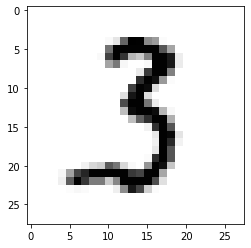

In [ ]:
# import matplotlib.pyplot as plt
#cmap顏色主題
plt.imshow(x_train[n],cmap='Greys')


In [ ]:
#資料整理
#轉成60000個784維的陣列 每個值除255轉成0/1
x_train=x_train.reshape(60000,784)/255
x_test=x_test.reshape(10000,784)/255
print("Print",y_train[n])
#每個結果轉成[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]
#onehot-encoding
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
#y_train轉成(50000,10)
# y_train.shape
y_train[n]


Print 3


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

4. step 1: 打造神經網路(函數學習機)

In [ ]:
#決定要幾層隱藏層,每層幾個神經元
#Sequential打造神經網路
model=Sequential()
#假設用3層隱藏層 20個神經元, 20,20,20 的隱藏層
#20個神經元,第一層不知道前面input的shape (784個像素),要input_dim幾個
#激勵函數,把線性掰彎
model.add(Dense(20,input_dim=784 ,activation='relu'))
#第二,三層
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
#output 10個的矩陣, softmax:全部output加起來=1
#e.x. 0123456789[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]
model.add(Dense(10,activation='softmax'))


組裝神經網路

In [ ]:
#選擇loss來計算誤差,mse:最標準的平均平方差,
#Optimizer選擇SGD,Learning_rate亂選,越小要訓練次數越多
#meterics:訓練中會show出正確率多少
model.compile(loss='mse',optimizer=SGD(learning_rate=0.087),metrics=['accuracy'])

觀看結果

In [ ]:
#看神經網路架構, 三個隱藏層 最後一個是輸出層
#隱藏層已知輸入層的數量,所以不需show
#Output_Shape: 一批一批batch送進去訓練
#e.x 50 看完50筆後要調參數檢討,
#Batch None:表示Batch幾筆資料都可以, 有彈性,不指定
#第一層要算784*20+20(Bias偏值)=15700個參數 美個神經元有自的偏值
#第二三層:20*20+20=420 輸出層:20*10+10=210
#total 15700+420+420+210=16750個參數
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,750
Trainable params: 16,750
Non-trainable params: 0
_________________________________________________________________


5. step2:訓練

In [ ]:
#開始訓練 訓練資料 訓練答案丟進去 
#batch_size,每次訓練的樣本數 看完100個手寫辨識後調一次參數 
#batch_size影響模型的優化程度和速度,在ram的效率跟容量間找平衡
#epochs 連續訓練幾次
#（1）batchsize：批大小。在深度學習中，一般採用SGD訓練，即每次訓練在訓練集中取batchsize個樣本訓練；
#（2）iteration：1個iteration等於使用batchsize個樣本訓練一次；
# （3）epoch：1個epoch等於使用訓練集中的全部樣本訓練一次；讓神經網路學幾次
# 舉個例子，訓練集有1000個樣本，batchsize=10，那麼：
# 訓練完整個樣本集需要：
# 100次iteration，1次epoch。
model.fit(x_train,y_train,batch_size=100,epochs=20)

#要看正確率accuracy有沒有慢慢墊高,有變高就是還有進步空間,就在執行一次


Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0893 - accuracy: 0.1627
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0864 - accuracy: 0.2539
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0794 - accuracy: 0.3594
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0682 - accuracy: 0.4487
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0560 - accuracy: 0.5979
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0454 - accuracy: 0.6771
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0375 - accuracy: 0.7326
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0301 - accuracy: 0.8061
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0248 - accuracy: 0.8417
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0216 - accuracy: 0.8609

6. step 預測

In [ ]:
#np.argmax 找出最大值的index
#axis一矩陣往下算該欄每列總和:axis=0, 算該列每欄總和axis=1 or -1
a=model.predict(x_test)
print(y_test[3])
print(a[3])
print(np.argmax(a,axis=-1))
y_predict=np.argmax(model.predict(x_test),axis=-1)
print(y_predict)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.9433881e-01 9.2019166e-13 9.4209955e-04 5.2832003e-04 6.1002588e-08
 4.0494222e-03 1.6656588e-07 4.0400099e-07 1.0541072e-04 3.5296252e-05]
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


用互動模式展示訓練成果

In [ ]:
from ipywidgets import interact_manual
def test(測試編號):
  print(x_test[測試編號].reshape(28,28).shape)
  print("y_test:",y_test[測試編號])
  plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
  print("神經網路判斷為:", y_predict[測試編號])
interact_manual(test,測試編號=(0,9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

看測試資料狀況,給神經網路總評量

In [ ]:
score=model.evaluate(x_test,y_test)
print("loss:",score[0])
print("accurate:",score[1])
#

313/313 [==============================] - 1s 2ms/step - loss: 0.0123 - accuracy: 0.9195
loss: 0.012255819514393806
accurate: 0.9194999933242798


如果訓練OK,可以存到google drive供日後使用

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


CD到Colab資料夾

In [ ]:
#My Drive是GOOGLE預設的名
%cd '/content/drive/My Drive/Colab Notebooks'
model.save('My_DNN_Model')

/content/drive/My Drive/Colab Notebooks
INFO:tensorflow:Assets written to: My_DNN_Model/assets
